In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random as rd

In [22]:
def generate_monthly_rates_uniform(rates):
    result = []
    for r in rates:
        for i in range(12):
            result += [(r+1)**(1/12)-1]
    return result

# Example
# Generate monthly move for given annualized move (7% first year, -10% second year)
generate_monthly_rates_uniform([0.07, -0.10])

[0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 0.005654145387405274,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721,
 -0.008741610954696721]

In [3]:
def generate_monthly_rates_normal(rates, monthly_volatility):
    if not isinstance(monthly_volatility, list):
        monthly_volatility = [monthly_volatility]
    while len(monthly_volatility) < len(rates):
        monthly_volatility += [monthly_volatility[-1]]
        
    result = []
    vol_index = 0
    for r in rates:
        vol = monthly_volatility[vol_index]
        vol_index+=1
        n = (r+1)**(1/12)-1
        y = []
        for i in range(11):
            y += [np.random.normal(loc=n*100, scale=vol, size=None)/100]
        y_sum = 1
        for m in y:
            y_sum *= (m+1)
        y += [(1+r)/y_sum - 1]
        result += y
    return result

# Example
# Generate random monthly move for given annualized move (7% first year, -10% second year)
generate_monthly_rates_normal([0.07, -0.10], 1)

[0.004736414107660195,
 -0.0122565071900601,
 -0.0006468434768130915,
 -0.0033409206624769395,
 0.005365134649934918,
 0.010405393220739913,
 0.011331426674460996,
 0.004612067234988143,
 -0.0010719728455722576,
 0.005108839403944303,
 0.0239469446310086,
 0.02020095906511843,
 -0.0022952323250348726,
 -0.013911839585038286,
 -0.001074460075156538,
 -0.0015368581993666064,
 0.011670199126578207,
 -0.005678630182750506,
 -0.015577865581358,
 -0.025017920437196608,
 -0.018766157337808974,
 -0.036726538400574466,
 -0.010223901162038515,
 0.015445811672649468]

In [4]:
def generate_monthly_rates_lognormal(rates, monthly_volatility):
    if not isinstance(monthly_volatility, list):
        monthly_volatility = [monthly_volatility]
    while len(monthly_volatility) < len(rates):
        monthly_volatility += [monthly_volatility[-1]]
        
    result = []
    vol_index = 0
    for r in rates:
        vol = monthly_volatility[vol_index]
        vol_index+=1
        n = (r+1)**(1/12)-1
        y = []
        for i in range(11):
            y += [np.random.lognormal(mean=n*100, sigma=vol, size=None)/100]
        y_sum = 1
        for m in y:
            y_sum *= (m+1)
        y += [(1+r)/y_sum - 1]
        result += y
    return result

# Example
# Generate random monthly move for given annualized move (7% first year, -10% second year)
generate_monthly_rates_lognormal([0.07, -0.10], 1.5)

[0.015304798629970069,
 0.01302866319561035,
 0.10807946725870674,
 0.010591793383008202,
 0.04114906098919215,
 0.0033315308706649577,
 0.08049933944792445,
 0.0034315551026515905,
 0.0021336604923365998,
 0.06763657878987557,
 0.041836513668113424,
 -0.2641307943609468,
 0.007546535266718316,
 0.0013455366603384014,
 0.0018001454021527316,
 0.004655825728899436,
 0.009476799263047394,
 0.0005684994413926454,
 0.0031750767050981116,
 0.03290640609896463,
 6.42711826152932e-05,
 0.003999592977497618,
 0.003740008719056441,
 -0.1597055884592259]

In [23]:
def historical_return(markets):
    import yfinance as yf 
    r=[]
    for market in markets:
        df = yf.download(market,period='max',interval='1mo')
        close = df['Close']
        for i in range(1,len(close)):
            r.append(((close[i]-close[i-1])/close[i-1]))
    return r[1:]

    
historical_data = historical_return(['^GSPC'])
historical_data

[*********************100%***********************]  1 of 1 completed


[-0.01764368078126391,
 0.11703362867768251,
 0.024377556878410388,
 0.012658227848101266,
 -0.04300003051757813,
 0.015151563467874827,
 0.07411222395472782,
 0.012937160496298125,
 0.0255440364767354,
 0.1199262151693335,
 0.002883018650931093,
 0.05708416295164507,
 -0.005827491059210579,
 -0.0023446450013528087,
 0.016059531389929663,
 -0.04279107893209949,
 0.10390656188616577,
 0.05363003726879921,
 0.09799168995650809,
 -0.04888045669542547,
 -0.19927056562626363,
 -0.1337473951659176,
 0.025334640760641878,
 0.06247086736253619,
 0.021500647276600858,
 0.03737108703711669,
 0.031055901111672304,
 -0.016465857578045605,
 -0.1645569916010459,
 0.03665689313589384,
 0.007543694562338559,
 -0.13008893670896243,
 -0.08875737520102059,
 -0.03305793126541769,
 -0.06349200619434207,
 0.05541071532038608,
 0.11365040715824737,
 -0.0743205824490292,
 -0.09586580768555193,
 -0.1371769167589584,
 0.13901685117553905,
 -0.07417399778346281,
 0.00946832620358148,
 -0.2994227793166614,
 0.074

In [6]:
def generate_montly_rates_reject_method(on, N):
    H = np.histogram(on,bins=5000,density=True)
    y = np.array(H[0])
    x = np.linspace(H[1][0],H[1][-1],len(y))
    R = []
    for i in range(N):
        search = True
        while search:
            j = rd.randint(0, len(x)-1)
            Y = x[j]
            U = rd.random()
            if U <= y[j]:
                search = False
                R.append(Y)
    return R

R = generate_montly_rates_reject_method(historical_data,10)
R

[0.039274747106575025,
 -0.06574774170683159,
 -0.029404433077981684,
 0.02600874851961843,
 0.04991518347319651,
 -0.07251892848559072,
 -0.06381311691290042,
 0.003898750874690715,
 0.01218999999153858,
 0.025870561034337602]

In [7]:
def generate_monthly_rates_reject_method_adapter(rates, monthly_volatility):
    count = len(rates) * 12
    return generate_montly_rates_reject_method(historical_data,count)   

generate_monthly_rates_reject_method_adapter([None, None, None], None)

[-0.018349434255517827,
 0.017579311917489737,
 0.0008586261985131238,
 0.009149875315361045,
 -0.013512872270689869,
 -0.014618372152936265,
 -0.0184876217407986,
 -0.13014310984768357,
 -0.007432622918334741,
 -0.00895268525642351,
 -0.06947880380941315,
 0.06801774404498107,
 0.0016877511101979215,
 0.008873500344799445,
 -0.11010592448196782,
 -0.00701806046249237,
 -0.02691705834292729,
 0.08086918017609529,
 0.030154373078042362,
 0.10767755232057019,
 0.005833375668621854,
 0.044111309091402984,
 -0.03313549518056319,
 0.025594186063776003,
 0.048256933649826916,
 0.0600028698986948,
 -0.0023196859629452393,
 0.05419899551690127,
 -0.08122474005828101,
 -0.09075967654265607,
 0.013157312388504205,
 0.07340705597093222,
 -0.013789247241251468,
 0.11361961418764449,
 0.04452587154724541,
 0.012051812506257809]

In [8]:
def compute_total_return(rates):
    v = 1
    for r in rates:
        v *= (1+r)
    return v-1

def compute_average_return(rates):
    t = compute_total_return(rates)
    d = len(rates)
    return (1+t)**(1/d)-1

def compute_yearly_return_from_monthly(rates):
    arates = []
    for i in range(round(len(rates)/12)):
        r = compute_total_return(rates[(i*12):((i+1)*12)])
        arates += [r]
        
    return arates

def compute_annualized_return_from_monthly(rates):
    return compute_average_return(compute_yearly_return_from_monthly(rates))

compute_annualized_return_from_monthly(historical_data)

0.05730885796425689

In [9]:
def generate_market(target, max_drawdown, max_up, vol, term, rd_algo = generate_monthly_rates_lognormal):    
    t = target if target is not None else 1
    random = [np.random.normal(loc=t*100, scale=vol, size=None)/100 for i in range(0, term)]
    mvol = [np.random.uniform(1, vol) for i in range(0, term)]    
    
    rates = rd_algo(random, mvol)
        
    # Keep data as it
    if target is None:
        return rates
    
    index = rd.choices(range(len(rates)), k=4)
    rates[index[0]] = max_drawdown
    rates[index[1]] = max_drawdown/2
    rates[index[2]] = max_up
    rates[index[3]] = max_up/2
    
    while abs(compute_annualized_return_from_monthly(rates) - target) > 0.001:
        a = compute_annualized_return_from_monthly(rates)        
        rates[rd.randrange(0,len(rates))] += 0.001 if a < target else -0.001
    
    return rates

# Example
# Generate random move (monthly) with 
# - a target (forced) annualized return (7%) 
# - one stresstest month at -50%
# - one super good month at +50%
# - for 3 years
generate_market(0.07, -0.5, +0.5, vol=2, term=3)

[-0.019505947204960947,
 0.011479604832907685,
 -0.27,
 0.006651541762173979,
 0.03228726126167955,
 0.07476851119123003,
 0.001785807973461044,
 -0.0038668446660507436,
 1.4292397148518945,
 0.012546826087059343,
 0.478,
 0.238,
 -0.01807904517795372,
 -0.021262243879060897,
 -0.024555479639169715,
 0.002322832780361694,
 -0.010719976253398718,
 -0.00728174333377048,
 -0.01592655153595467,
 -0.018145735993768727,
 0.008185909132890471,
 -0.524,
 0.23729297857673948,
 -0.22629293393327,
 -0.010619241895724878,
 -0.010427012173765397,
 -0.010743625898614623,
 -0.009484959476307092,
 0.05254891953817982,
 0.01601336707407533,
 -0.013337540797039946,
 -0.016395840248314985,
 -0.007768621293245622,
 0.16382954999716687,
 0.035709513766383295,
 -0.3065223910333562]

In [10]:
def generate_amounts(ini, monthly, term):
    return [ini] + [monthly for i in range(term*12)]

# Example
# Invest 10 000 at start and 500 per month for 1 year
generate_amounts(10_000, 500, 1)

[10000, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]

In [11]:
def run_no_leverage(amounts, rrates, fiscality=0.172):
    rates = [0] + rrates
    term = max(len(amounts), len(rates))
    price = 100
    position = 0    
    saving = 0
    df = {
     'date': [],
     'saving': [],
     'position': [],
     'market_value': []}
        
    for i in range(term):
        if i < len(amounts) and amounts[i] > 0:
            position += amounts[i] / price
            saving += amounts[i]
        if i < len(rates):
            price *= (1+rates[i])
        df['date'] += [i]
        df['saving'] += [saving]
        df['position'] += [position]
        df['market_value'] += [position * price]
        
    df = pd.DataFrame.from_dict(df)
    df['pnl_gross'] = df.apply(lambda x: (x['market_value'] - x['saving']), axis=1)
    df['pnl'] = df.apply(lambda x: x['pnl_gross'] * (1-fiscality) if x['pnl_gross'] > 0 else x['pnl_gross'], axis=1)

    return df

# Example
# For 2 years
# 10k at start + 500 per month
# target = 7%
# fiscality = PEA
amounts = generate_amounts(10_000, 500, 2)
monthly_rates = generate_monthly_rates_uniform([0.07, 0.07])
run_no_leverage(amounts, monthly_rates)

date  saving    position  market_value    pnl_gross          pnl
0      0   10000  100.000000  10000.000000     0.000000     0.000000
1      1   10500  105.000000  10559.368527    59.368527    49.157140
2      2   11000  109.971888  11121.899804   121.899804   100.933038
3      3   11500  114.915823  11687.611715   187.611715   155.342500
4      4   12000  119.831961  12256.522244   256.522244   212.400418
5      5   12500  124.720458  12828.649475   328.649475   272.121766
6      6   13000  129.581471  13404.011597   404.011597   334.521602
7      7   13500  134.415154  13982.626900   482.626900   399.615073
8      8   14000  139.221659  14564.513778   564.513778   467.417408
9      9   14500  144.001141  15149.690729   649.690729   537.943924
10    10   15000  148.753751  15738.176356   738.176356   611.210023
11    11   15500  153.479640  16329.989366   829.989366   687.231195
12    12   16000  158.178959  16925.148573   925.148573   766.023018
13    13   16500  162.851856  17523.672896  1023.672896   847.601158
14    14   17000  167.498480  18125.581363  1125.581363   931.981369
15    15   17500  172.118980  18730.893108  1230.893108  1019.179494
16    16   18000  176.713501  19339.627374  1339.627374  1109.211465
17    17   18500  181.282191  19951.803511  1451.803511  1202.093307
18    18   19000  185.825193  20567.440982  1567.440982  1297.841133
19    19   19500  190.342654  21186.559356  1686.559356  1396.471147
20    20   20000  194.834715  21809.178316  1809.178316  1497.999645
21    21   20500  199.301520  22435.317653  1935.317653  1602.443017
22    22   21000  203.743212  23064.997274  2064.997274  1709.817743
23    23   21500  208.159931  23698.237194  2198.237194  1820.140397
24    24   22000  212.551817  24335.057546  2335.057546  1933.427648

In [12]:
def run_leverage(amounts, rrates, leverage, fcost):
    rates = [0] + rrates
    term = max(len(amounts), len(rates))
    price = 100
    position = 0    
    saving = 0
    market_value = 0
    elv = 0
    margin_req = 0
    available = 0
    cash = 0
    computed_leverage = 0
    margin_call = False
    zero = False
    df = {
         'date': [],
         'saving': [],
         'cash': [],
         'position': [],
         'market_value': [],
         'elv': [],
         'margin_req': [],
         'available': [],
         'leverage': [],
         'margin_call': [],
         'zero': []}
    
    def add_df(i):
        df['date'] += [i]
        df['cash'] += [cash]
        df['saving'] += [saving]
        df['position'] += [position]
        df['market_value'] += [market_value]
        df['elv'] += [elv]
        df['margin_req'] += [margin_req]
        df['available'] += [available]
        df['leverage'] += [computed_leverage]
        df['margin_call'] += [margin_call]
        df['zero'] += [zero]
    
    for i in range(term):
        # update fees & margins
        credit = cash if cash < 0 else 0 
        cost = (fcost/12 * credit)    

        market_value = price * position
        elv = cash + market_value
        margin_req = 0.35 * market_value
        available = elv - margin_req
        margin_call = False
        zero = False
        
        # margin call
        if available < 0:
            margin_call = True
            liquidate = 4 * abs(available)
            liquidate_quantity = liquidate / price
            position -= liquidate_quantity
            cash += liquidate_quantity * price
            
        # lost everything, play again
        if position < 0:
            position = 0
            cash = 0
            zero = True
                        
        # buy
        if i < len(amounts) and amounts[i] > 0:
            buy_amount = amounts[i] * leverage
            saving += amounts[i]
            cash += amounts[i]
            cash += cost
                                
            cash -= buy_amount
            position += cost / price
            position += buy_amount / price      
       
        # update price for next term
        if i < len(rates):
            price *= (1+rates[i])                        
                 
        market_value = price * position
        elv = cash + market_value
        margin_req = 0.35 * market_value
        available = elv - margin_req
        computed_leverage = market_value / elv if elv != 0 else 0
            
        add_df(i)
    
    df = pd.DataFrame.from_dict(df)
    df['pnl_gross'] = df.apply(lambda x: (x['elv'] - x['saving']), axis=1)
    df['pnl'] = df.apply(lambda x: x['pnl_gross'] * (1-0.3) if x['pnl_gross'] > 0 else x['pnl_gross'], axis=1)
    
    return df

# Example
# For 2 years
# 10k at start + 500 per month
# target = 7%
# leverage = 1.8
# financing cost = 1.25%
# fiscality = CTO
amounts = generate_amounts(10_000, 500, 2)
monthly_rates = generate_monthly_rates_uniform([0.07, 0.07])
run_leverage(amounts, monthly_rates, 1.8, 1.25/100)

date  saving          cash    position  market_value           elv  \
0      0   10000  -8000.000000  180.000000  18000.000000  10000.000000   
1      1   10500  -8408.333333  188.916667  18998.482897  10590.149563   
2      2   11000  -8817.092014  197.778971  20002.183608  11185.091595   
3      3   11500  -9226.276485  206.587238  21011.131192  11784.854708   
4      4   12000  -9635.887189  215.341792  22025.354869  12389.467679   
5      5   12500 -10045.924572  224.042952  23044.884023  12998.959451   
6      6   13000 -10456.389077  232.691039  24069.748206  13613.359129   
7      7   13500 -10867.281149  241.286369  25099.977135  14232.695987   
8      8   14000 -11278.601233  249.829260  26135.600696  14856.999463   
9      9   14500 -11690.349776  258.320023  27176.648942  15486.299166   
10    10   15000 -12102.527224  266.758972  28223.152096  16120.624873   
11    11   15500 -12515.134023  275.146415  29275.140553  16760.006530   
12    12   16000 -12928.170621  283.482662  30332.644876  17404.474255   
13    13   16500 -13341.637465  291.768019  31395.695803  18054.058337   
14    14   17000 -13755.535004  300.002790  32464.324244  18708.789240   
15    15   17500 -14169.863687  308.187278  33538.561286  19368.697599   
16    16   18000 -14584.623961  316.321783  34618.438187  20033.814225   
17    17   18500 -14999.816278  324.406606  35703.986384  20704.170106   
18    18   19000 -15415.441087  332.442044  36795.237491  21379.796405   
19    19   19500 -15831.498838  340.428392  37892.223300  22060.724463   
20    20   20000 -16247.989982  348.365944  38994.975783  22746.985801   
21    21   20500 -16664.914972  356.254993  40103.527090  23438.612118   
22    22   21000 -17082.274258  364.095828  41217.909556  24135.635297   
23    23   21500 -17500.068294  371.888739  42338.155694  24838.087400   
24    24   22000 -17918.297532  379.634013  43464.298204  25546.000672   

      margin_req     available  leverage  margin_call   zero    pnl_gross  \
0    6300.000000   3700.000000  1.800000        False  False     0.000000   
1    6649.469014   3940.680549  1.793977        False  False    90.149563   
2    7000.764263   4184.327332  1.788290        False  False   185.091595   
3    7353.895917   4430.958790  1.782893        False  False   284.854708   
4    7708.874204   4680.593475  1.777748        False  False   389.467679   
5    8065.709408   4933.250043  1.772825        False  False   498.959451   
6    8424.411872   5188.947257  1.768098        False  False   613.359129   
7    8784.991997   5447.703989  1.763543        False  False   732.695987   
8    9147.460244   5709.539219  1.759144        False  False   856.999463   
9    9511.827130   5974.472036  1.754883        False  False   986.299166   
10   9878.103234   6242.521639  1.750748        False  False  1120.624873   
11  10246.299193   6513.707336  1.746726        False  False  1260.006530   
12  10616.425706   6788.048548  1.742807        False  False  1404.474255   
13  10988.493531   7065.564806  1.738983        False  False  1554.058337   
14  11362.513486   7346.275755  1.735245        False  False  1708.789240   
15  11738.496450   7630.201149  1.731586        False  False  1868.697599   
16  12116.453365   7917.360860  1.728000        False  False  2033.814225   
17  12496.395234   8207.774872  1.724483        False  False  2204.170106   
18  12878.333122   8501.463283  1.721028        False  False  2379.796405   
19  13262.278155   8798.446308  1.717633        False  False  2560.724463   
20  13648.241524   9098.744277  1.714292        False  False  2746.985801   
21  14036.234482   9402.377637  1.711003        False  False  2938.612118   
22  14426.268344   9709.366953  1.707762        False  False  3135.635297   
23  14818.354493  10019.732907  1.704566        False  False  3338.087400   
24  15212.504371  10333.496301  1.701413        False  False  3546.000672   

            pnl  
0      0.000000  
1     63.104694  
2    129.564116  
3   

In [13]:
# Compare 'no_leverage' and 'leverage' with multiple scenario (volatility, yearly performance..)
def compare(leverage=[2], 
            targets=[0.07], 
            initial_amount=0, 
            monthly_amount=500, 
            term=10,
            t=100, 
            vol=[1.0, 2.0, 3, 4], 
            max_drawdown=-0.40, 
            max_up=0.30,
            financing_cost=1.25/100,
            fiscality_baseline=0.172,
            rd_algo=generate_monthly_rates_lognormal):
    amounts = generate_amounts(initial_amount, monthly_amount, term)    
    pnl = {'Baseline': [], 'Savings': [], 'Total Move %': [], 'Best Year %': [], 'Worst Year %': [], 'Annualized %': []}
    for l in leverage:
        pnl[f'Leveraged_x{l}'] = []
    for v in vol:
        for tgt in targets:
            for _ in range(t):
                rates = generate_market(tgt, max_drawdown, max_up, v, term,rd_algo=rd_algo)
                a = run_no_leverage(amounts, rates, fiscality_baseline)
                s = a.tail(1)['saving'].values[0]
                a = a.tail(1)['pnl'].values[0]
                
                pnl['Total Move %'] += [compute_total_return(rates) * 100]
                pnl['Best Year %'] += [max(compute_yearly_return_from_monthly(rates)) * 100]
                pnl['Worst Year %'] += [min(compute_yearly_return_from_monthly(rates)) * 100]
                pnl['Annualized %'] += [compute_annualized_return_from_monthly(rates) * 100]            
                pnl['Savings'] += [s]
                pnl['Baseline'] += [s+a]

                for l in leverage:
                    b = run_leverage(amounts, rates, l, financing_cost)     
                    b = b.tail(1)['pnl'].values[0]
                    pnl[f'Leveraged_x{l}'] += [s+b]
        
    pnl = pd.DataFrame.from_dict(pnl)
    for l in leverage:
        pnl[f'Diff_x{l}'] = pnl.apply(lambda x: x[f'Leveraged_x{l}'] - x['Baseline'], axis=1)
    return pnl

In [14]:
def plot_pnl(result, scrap=0, title="P&L"):
    c = len(result['Baseline']) - scrap*2
    colcount = 0

    cols = ['Savings', 'Baseline']
    cols += [i for i in result.columns if "Leveraged_" in i]
    cols_points = [np.sort(result[i]) for i in cols]
     
    if scrap:
        cols_points = [p[scrap:-scrap] for p in cols_points]  
   
    colcount+= len(cols) + 1
    cmap = plt.cm.get_cmap('hsv', colcount)
    
    legends = []
    for i in range(len(cols)):
        s, = plt.plot(cols_points[i], label=cols[i], color=cmap(i))
        legends += [s]
    
    plt.legend(handles=legends)

    p = np.array([i*10 for i in range(11)])
    plt.xticks((c-1) * p/100., map(str, p))

    plt.title(title)
    plt.grid()
#    plt.rcParams["figure.figsize"] = (8,10)

    plt.show()

In [15]:
def plot_summary(result, scrap=0, title="Diff to baseline"):
    c = len(result['Baseline']) - scrap*2
    colcount = 2
    
    p = np.array([i*10 for i in range(11)])
    plt.xticks((c-1) * p/100., map(str, p))

    cols = [i for i in result.columns if "Diff_" in i]
    cols_points = [np.sort(result[i]) for i in cols]
    
    if scrap:
        cols_points = [p[scrap:-scrap] for p in cols_points]    

    colcount+= len(cols) + 1
    cmap = plt.cm.get_cmap('hsv', colcount)
      
    base, = plt.plot([0, c-1], [0, 0], label="Baseline", color=cmap(1), linestyle='-', linewidth=1)
    legends = [base]
    
    for i in range(len(cols)):
        s, = plt.plot(cols_points[i], label=cols[i], color=cmap(i+2))
        legends += [s]
    
    plt.legend(handles=legends)
    
    plt.title(title)
    plt.grid()

#    plt.rcParams["figure.figsize"] = (10,10)
    plt.show

In [24]:
def run(term):
    lev = [1.7, 2, 2.3]
    #targets_yearly_performance=[0.04, 0.055, 0.07, 0.085, 0.10]
    #rd_algo = generate_monthly_rates_lognormal
    #vols=[0.5, 0.7, 1, 1.3, 1.5]
    targets_yearly_performance=[None]
    rd_algo = generate_monthly_rates_reject_method_adapter
    vols=[1]
    nb_simulation = 50
    result = compare(leverage=lev,                  
                 vol=vols,
                 t=nb_simulation, 
                 max_drawdown=-0.45,
                 max_up=0.30,
                 initial_amount=10000,
                 monthly_amount=500,
                 targets=targets_yearly_performance,
                 term=term,
                 financing_cost=0.0125,
                 fiscality_baseline=0.172,
                 rd_algo=rd_algo)

    plot_pnl(result, title=f"P&L {term} Years", scrap=1)
    plot_summary(result, title=f"Diff to Baseline {term} - Years", scrap=1)


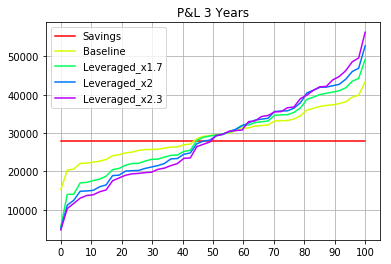

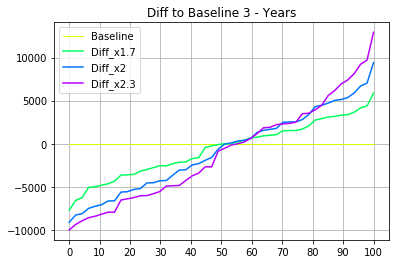

In [25]:
run(term=3)

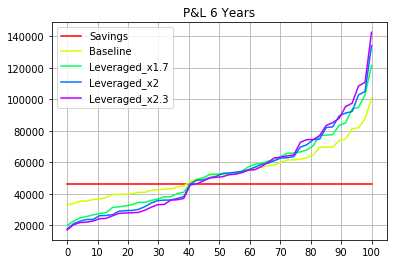

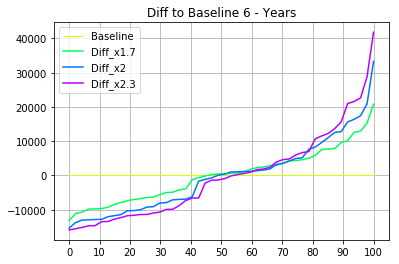

In [26]:
run(term=6)

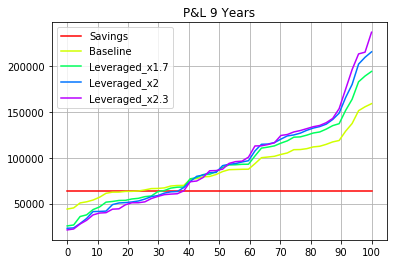

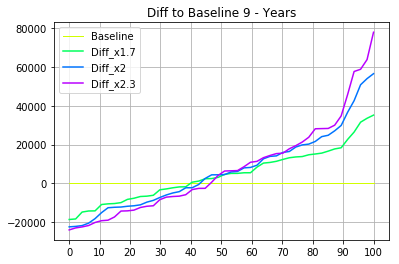

In [27]:
run(term=9)